## Khai báo các thư viện cần dùng

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer


# Phần 1. Tiền xử lý dữ liệu

In [2]:
# Đọc dữ liệu từ file CSV
file_path = '../data/Life Expectancy Data.csv'  
df = pd.read_csv(file_path)

# Loại bỏ khoảng trắng thừa trong tên cột
df.columns = df.columns.str.strip()

df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## 1.1 Ý nghĩa của các thuộc tính trong dữ liệu:

1. Country: Tên quốc gia.
2. Year: Năm thu thập dữ liệu.
3. Status: Trạng thái phát triển (Developed/Developing).
4. Life expectancy: Tuổi thọ trung bình (đầu ra - target).
5. Adult Mortality: Tỷ lệ tử vong ở người lớn.
6. Infant deaths: Số trẻ sơ sinh tử vong trên 1000 dân.
7. Alcohol: Tiêu thụ rượu bình quân đầu người.
8. Percentage expenditure: Chi tiêu y tế chiếm phần trăm GDP.
9. Hepatitis B: Tỷ lệ tiêm chủng viêm gan B.
10. Measles: Số ca sởi trên 1000 dân.
11. BMI: Chỉ số khối cơ thể trung bình.
12. Under-five deaths: Số trẻ dưới 5 tuổi tử vong trên 1000 dân.
13. Polio: Tỷ lệ tiêm chủng bại liệt.
14. Total expenditure: Tổng chi tiêu y tế chiếm phần trăm GDP.
15. Diphtheria: Tỷ lệ tiêm chủng bạch hầu.
16. HIV/AIDS: Số ca tử vong do HIV/AIDS trên 1000 dân.
17. GDP: GDP bình quân đầu người.
18. Population: Dân số quốc gia.
19. Thinness 1-19 years: Tỷ lệ gầy ở trẻ 1-19 tuổi.
20. Thinness 5-9 years: Tỷ lệ gầy ở trẻ 5-9 tuổi.
21. Income composition of resources: Chỉ số phân bổ thu nhập.
22. Schooling: Số năm học trung bình.

Các thuộc tính này dùng để dự đoán tuổi thọ trung bình dựa trên yếu tố y tế - xã hội.

Hiển thị kích thước của bảng dữ liệu

In [3]:
df.shape

(2938, 22)

Hiển thị thông tin tóm tắt về DataFrame df. Cụ thể cung cấp các thông tin sau:
- Số hàng và số cột của df
- Tên cột và loại dữ liệu tương ứng của từng cột
- Số lượng giá trị không bị thiếu của từng cột
- Tổng dung lượng bộ nhớ mà df sử dụng

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Thống kê mô tả của target (Life expectancy)

In [5]:
df['Life expectancy'].describe()

count    2928.000000
mean       69.224932
std         9.523867
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: Life expectancy, dtype: float64

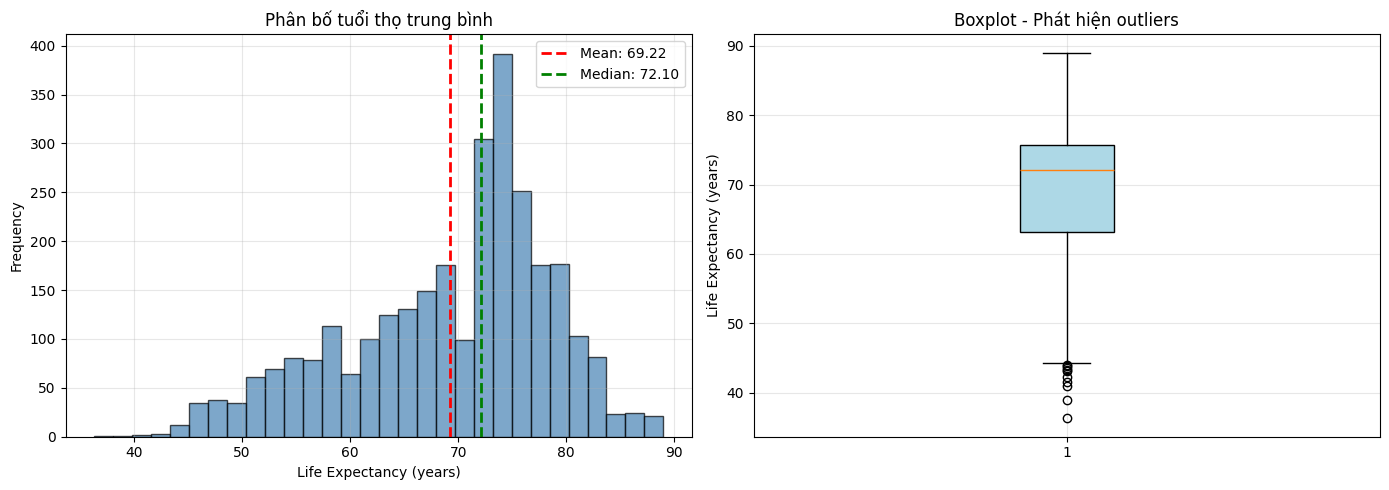

In [6]:
# VẼ BIỂU ĐỒ PHÂN BỐ TARGET
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram + KDE
axes[0].hist(df['Life expectancy'].dropna(), bins=30, alpha=0.7, 
             color='steelblue', edgecolor='black')
axes[0].axvline(df['Life expectancy'].mean(), color='red', 
                linestyle='--', linewidth=2, label=f"Mean: {df['Life expectancy'].mean():.2f}")
axes[0].axvline(df['Life expectancy'].median(), color='green', 
                linestyle='--', linewidth=2, label=f"Median: {df['Life expectancy'].median():.2f}")
axes[0].set_xlabel('Life Expectancy (years)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Phân bố tuổi thọ trung bình')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Boxplot
box = axes[1].boxplot(df['Life expectancy'].dropna(), vert=True, patch_artist=True)
box['boxes'][0].set_facecolor('lightblue')
axes[1].set_ylabel('Life Expectancy (years)')
axes[1].set_title('Boxplot - Phát hiện outliers')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

Lệnh df.isna().sum() trong pandas được sử dụng để kiểm tra số lượng giá trị bị thiếu (NaN - Not a Number) trong mỗi cột của DataFrame df. Cụ thể:

df.isna(): Trả về một DataFrame với các giá

- df.isna(): Trả về một DataFrame với các giá trị boolean, trong đó True chỉ ra giá trị bị thiếu (NaN) và False chỉ ra giá trị không bị thiếu.
- sum(): Tổng hợp số lượng giá trị True (giá trị bị thiếu) trong mỗi cột. Kết quả là một danh sách cho biết số lượng giá trị thiếu trong từng cột của DataFrame.

In [7]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [8]:
# Tính toán missing values
missing_before = df.isna().sum()
missing_count = missing_before.sum()

print(f"Tổng số missing values: {missing_count} ({missing_count/df.size*100:.2f}%)")
print(f"\nChi tiết missing values theo từng cột:")
print(missing_before[missing_before > 0].sort_values(ascending=False))

Tổng số missing values: 2563 (3.97%)

Chi tiết missing values theo từng cột:
Population                         652
Hepatitis B                        553
GDP                                448
Total expenditure                  226
Alcohol                            194
Income composition of resources    167
Schooling                          163
thinness 5-9 years                  34
thinness  1-19 years                34
BMI                                 34
Polio                               19
Diphtheria                          19
Life expectancy                     10
Adult Mortality                     10
dtype: int64


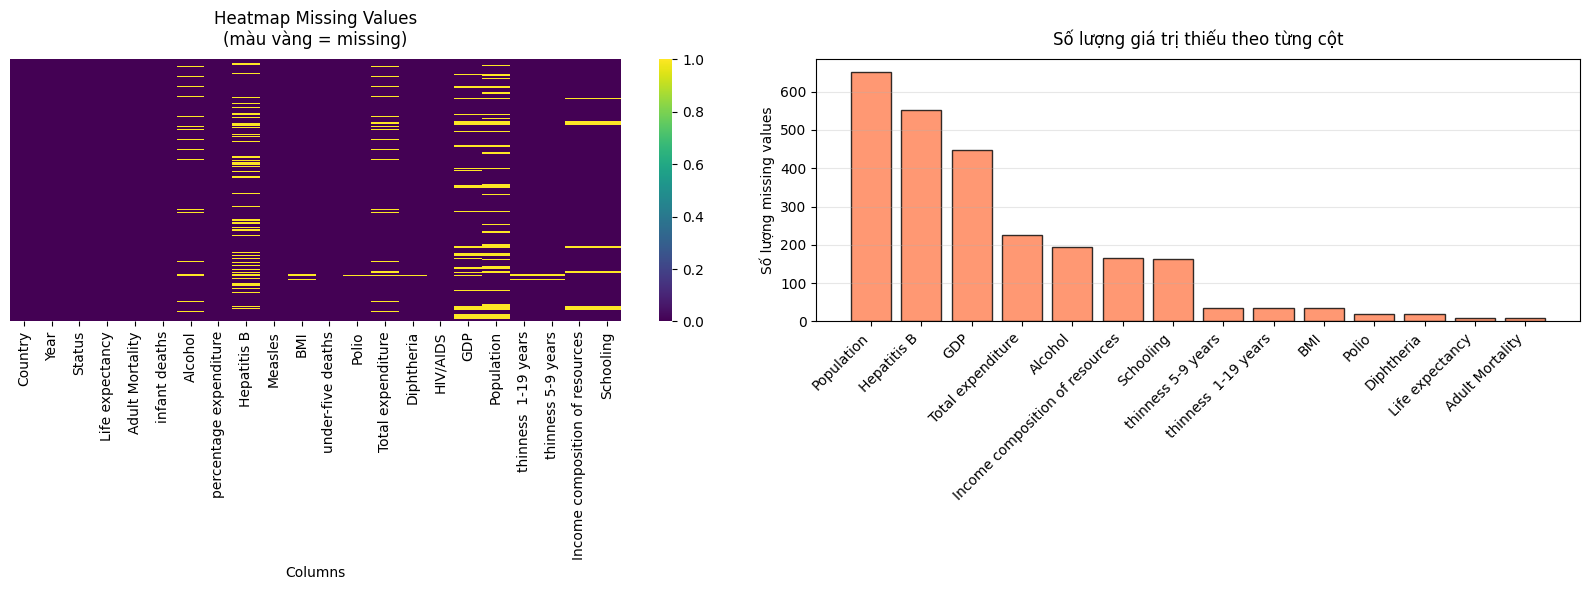

In [9]:
# VẼ 2 BIỂU ĐỒ MISSING VALUES (trên cùng 1 figure)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Heatmap
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis', ax=axes[0])
axes[0].set_title('Heatmap Missing Values\n(màu vàng = missing)', fontsize=12, pad=10)
axes[0].set_xlabel('Columns')

# Subplot 2: Bar chart
missing_df = missing_before[missing_before > 0].sort_values(ascending=False)
axes[1].bar(range(len(missing_df)), missing_df.values, color='coral', edgecolor='black', alpha=0.8)
axes[1].set_xticks(range(len(missing_df)))
axes[1].set_xticklabels(missing_df.index, rotation=45, ha='right')
axes[1].set_ylabel('Số lượng missing values')
axes[1].set_title('Số lượng giá trị thiếu theo từng cột', fontsize=12, pad=10)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/missing_values_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 1.2 Xử lý missing values

Xử lý giá trị thiếu (Missing Values)

> **Công thức**:  
> $$
\hat{x}_{ij} = \frac{1}{n} \sum_{k=1}^{n} x_{kj} \quad \text{(nếu dùng mean)}
$$

> **Chiến lược**: Dùng `SimpleImputer(strategy='mean')`

In [10]:
# Impute target trước
if df['Life expectancy'].isna().sum() > 0:
    target_mean = df['Life expectancy'].mean()
    target_imputer = SimpleImputer(strategy='mean')
    df['Life expectancy'] = target_imputer.fit_transform(df[['Life expectancy']])
    print(f"✓ Đã impute 'Life expectancy' bằng mean = {target_mean:.2f}")

# Impute numeric features
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols.remove('Life expectancy')
numeric_cols.remove('Year')

imputer_num = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer_num.fit_transform(df[numeric_cols])
print(f"✓ Đã impute {len(numeric_cols)} features numeric bằng mean")

# Kiểm tra sau khi xử lý
missing_after = df.isnull().sum().sum()
print(f"\nMissing values sau xử lý: {missing_after}")
print(f"Đã xử lý thành công {missing_count - missing_after} missing values!")

✓ Đã impute 'Life expectancy' bằng mean = 69.22
✓ Đã impute 18 features numeric bằng mean

Missing values sau xử lý: 0
Đã xử lý thành công 2563 missing values!


## 1.3 Mã hóa categorical features

DROP 'Country' vì:
- Có 193 unique values → tạo 192 dummy columns
- Gây curse of dimensionality, overfitting
- Country đã được thể hiện gián tiếp qua GDP, Schooling, Status, etc.

In [11]:
# DROP Country để tránh curse of dimensionality
df = df.drop('Country', axis=1)

# One-Hot Encoding cho Status (chỉ có 2 values: Developed/Developing)
print("\n One-Hot Encoding cho 'Status' (drop_first=True để tránh multicollinearity)")
print(f"  Trước encoding: Status có {df['Status'].nunique()} unique values")
df = pd.get_dummies(df, columns=['Status'], drop_first=True)
print(f"  Sau encoding: Tạo cột 'Status_Developing' (0=Developed, 1=Developing)")


 One-Hot Encoding cho 'Status' (drop_first=True để tránh multicollinearity)
  Trước encoding: Status có 2 unique values
  Sau encoding: Tạo cột 'Status_Developing' (0=Developed, 1=Developing)


Kích thước dữ liệu sau preprocessing

In [12]:
df.shape

(2938, 21)


In dữ liệu sau khi làm sạch (5 dòng đầu)

In [13]:

df.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
0,2015,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,True
1,2014,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,True
2,2013,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,True
3,2012,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,True
4,2011,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,True


Tổng số features

In [14]:
print(f"\nTổng số features: {df.shape[1] - 1} (không tính target)")


Tổng số features: 20 (không tính target)


# Phần 2: Phân tích và trực quan hóa dữ liệu

## 2.1. Tách đầu vào và đầu ra

- Loại bỏ Life expectancy khỏi df
- axit = 1 --> xóa cột
- Phần còn lại của df <-- X: các biến đầu vào để dự đoán đầu ra y là Life expectancy

In [15]:
# Tách đầu vào và đầu ra
X = df.drop(['Life expectancy'], axis=1)  # Loại bỏ target
y = df['Life expectancy']

Chia dữ liệu thành tập huấn luyện (training set) và tập kiểm tra (test set)

train_test_split: Đây là hàm từ thư viện scikit-learn, được sử dụng để chia tập dữ liệu thành hai phần: tập huấn luyện và tập kiểm tra.

test_size=0.3:

- test_size chỉ định tỷ lệ dữ liệu sẽ được dùng làm tập kiểm tra.
- Ở đây, test_size=0.3 có nghĩa là 30% dữ liệu sẽ được sử dụng cho tập kiểm tra, và 80% dữ liệu còn lại sẽ được dùng cho tập huấn luyện.

random_state=42:

- random_state là một tham số được sử dụng để đảm bảo tính tái lập (reproducibility).
- Khi ta thiết lập random_state=42, việc chia dữ liệu sẽ luôn tạo ra cùng một kết quả mỗi khi bạn chạy mã, đảm bảo kết quả là nhất quán khi bạn thử lại.
- Giá trị 42 không có ý nghĩa đặc biệt, nó chỉ là một số được dùng làm hạt ngẫu nhiên (random seed).

Kết quả của train_test_split: Hàm này trả về bốn biến:

- X_train: Tập đặc trưng huấn luyện, chứa 70% của X: gồm 70% mẫu dữ liệu của nhãn M, 70% mẫu dữ liệu của nhãn B.
- X_test: Tập đặc trưng kiểm tra, chứa 30% của X: gồm 30% mẫu dữ liệu của nhãn M, 30% mẫu dữ liệu của nhãn B.
- y_train: Tập nhãn huấn luyện, chứa 70% của y: là nhãn của X_train, tỷ lệ như trên.
- y_test: Tập nhãn kiểm tra, chứa 30% của y.

In [16]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

## 2.2. Phân tích thành phần chính PCA

### 2.2.1. Chuẩn hóa dữ liệu

Đoạn mã này sử dụng StandardScaler từ thư viện scikit-learn để chuẩn hóa dữ liệu. Việc chuẩn hóa là một bước rất quan trọng trong quy trình học máy, đặc biệt là đối với các mô hình nhạy cảm với sự khác biệt về đơn vị đo của các đặc trưng (như SVM, KNN, Logistic Regression,...).

StandardScaler: Đây là một công cụ trong scikit-learn dùng để chuẩn hóa các đặc trưng của dữ liệu bằng cách tạo ra dữ liệu có phân phối chuẩn (normal distribution) với:

Mean (trung bình) = 0.
Standard Deviation (độ lệch chuẩn) = 1.
Công thức chuẩn hóa

Xét lần lượt từng cột thuộc tính, với mỗi giá trị ( x ) thì ta chuẩn hóa thành x_scaled như sau:
$x_{\text{scaled}} = \frac{x - \mu}{\sigma}$
Trong đó:

( x ) là giá trị của dữ liệu.
( N ) là số mẫu dữ liệu, ở đây cụ thể bằng 569.
( mu ) là giá trị trung bình của đặc trưng, được tính như sau:
                    $$
                    \mu = \frac{x1 + x2 + x3 + ... +xN}{N} 
                    $$

( sigma ) là độ lệch chuẩn của đặc trưng, được tính như sau:
                    $$
                    \sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2}
                    $$

In [17]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Đã chuẩn hóa: mean ≈ 0, std ≈ 1")
print(f"X_train_scaled: mean={X_train_scaled.mean():.6f}, std={X_train_scaled.std():.6f}")

Đã chuẩn hóa: mean ≈ 0, std ≈ 1
X_train_scaled: mean=-0.000000, std=1.000000


### 2.2.2. Thực hiện giảm chiều bằng PCA
pca = PCA()

- PCA(): Đây là cách khởi tạo một đối tượng của lớp PCA từ thư viện scikit-learn.
- Khi khởi tạo PCA mà không truyền thêm tham số, PCA sẽ giữ lại tất cả các thành phần chính của dữ liệu.

fit_transform(): Đây là một phương thức kết hợp hai bước trong quá trình PCA:

- fit(): Phương thức này học các thành phần chính từ bộ dữ liệu huấn luyện (X_train_scaled). Nó sẽ tính toán ma trận hiệp phương sai của dữ liệu và tìm các thành phần chính.
- transform(): Sau khi đã "học" xong các thành phần chính, phương thức transform() sẽ chiếu dữ liệu gốc vào không gian mới được tạo ra bởi các thành phần chính.

In [18]:
# Thực hiện PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

### 2.2.3. Phân tích phương sai giải thích
pca.explained_variance_ratio_:

- Đây là thuộc tính của đối tượng PCA sau khi đã thực hiện fit() trên dữ liệu. Nó trả về tỷ lệ phương sai giải thích của mỗi thành phần chính.
- Phương sai giải thích cho biết mức độ quan trọng của mỗi thành phần chính trong việc giải thích sự biến thiên trong dữ liệu.

Kết quả explained_variance là một mảng chứa tỷ lệ phương sai giải thích của từng thành phần chính.

np.cumsum(): Đây là hàm trong thư viện NumPy tính tổng dồn của một mảng. Cộng dồn các giá trị của explained_variance để tính tổng phương sai giải thích của tất cả các thành phần chính đến một thành phần chính cụ thể.

cumulative_variance: Kết quả là một mảng chứa tổng phương sai giải thích tích lũy của các thành phần chính.

In [19]:
# Phân tích phương sai giải thích
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

### 2.2.4. Vẽ biểu đồ phương sai giải thích PCA.

Biểu đồ này sẽ giúp bạn hiểu được mức độ đóng góp của các thành phần chính trong PCA vào phương sai tổng thể, với một ngưỡng được chỉ ra để xác định số lượng thành phần chính cần thiết để giải thích ít nhất 95% phương sai của dữ liệu.

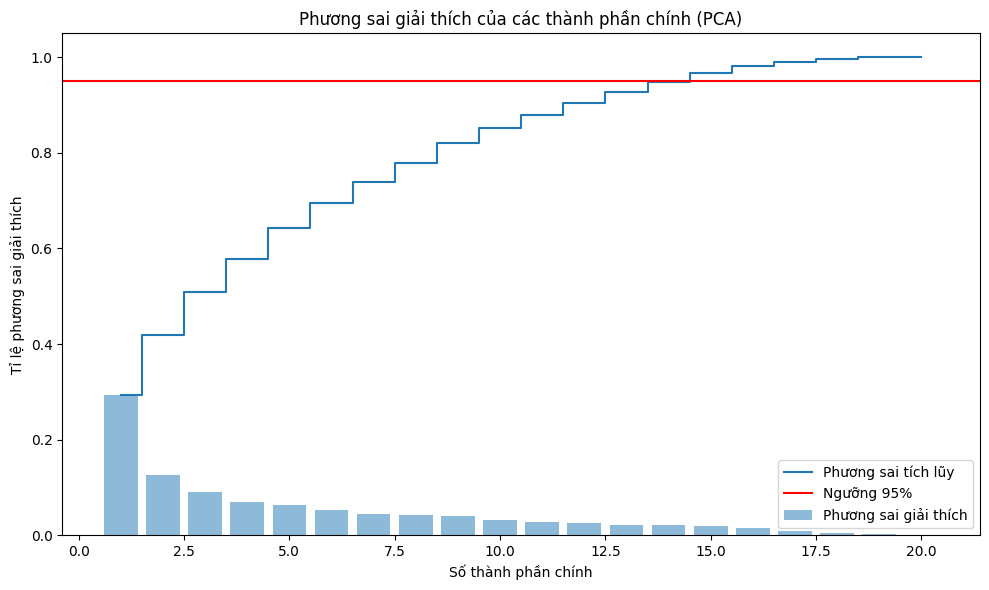

In [20]:
# Vẽ đồ thị phương sai giải thích
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center',
        label='Phương sai giải thích')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid',
         label='Phương sai tích lũy')
plt.axhline(y=0.95, color='r', linestyle='-', label='Ngưỡng 95%')
plt.xlabel('Số thành phần chính')
plt.ylabel('Tỉ lệ phương sai giải thích')
plt.title('Phương sai giải thích của các thành phần chính (PCA)')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('../results/figures/pca_explained_variance.png')

### 2.2.5. Xác định số thành phần chính cần để giữ 95% phương sai

cumulative_variance >= 0.95:

- cumulative_variance là mảng chứa phương sai tích lũy của các thành phần chính (được tính bằng cách cộng dồn explained_variance).
- Câu lệnh này kiểm tra điều kiện, trả về một mảng boolean (True/False), nơi mỗi giá trị tương ứng với việc liệu phương sai tích lũy ở đó có lớn hơn hoặc bằng 95% hay không.

np.argmax()

- np.argmax() trả về chỉ số (index) của phần tử đầu tiên có giá trị True trong mảng boolean được tạo ra từ điều kiện cumulative_variance >= 0.95.
- Cộng 1 do np.argmax() trả về chỉ số bắt đầu từ 0, nhưng trong PCA, số thành phần chính bắt đầu từ 1

In [21]:
# Xác định số thành phần chính cần để giữ 95% phương sai
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Số thành phần chính cần để giữ 95% phương sai: {n_components_95}")

Số thành phần chính cần để giữ 95% phương sai: 15


In [22]:
# Áp dụng PCA với số thành phần được chọn
pca_95 = PCA(n_components=n_components_95)
X_train_pca_95 = pca_95.fit_transform(X_train_scaled)
X_test_pca_95 = pca_95.transform(X_test_scaled)

### 2.2.6. Trực quan hóa dữ liệu PCA

Trực quan hóa dữ liệu sau khi áp dụng PCA bằng cách vẽ biểu đồ phân tán cho hai thành phần chính đầu tiên. Việc này giúp hình dung sự phân bố và mối quan hệ giữa các mẫu dữ liệu trong không gian giảm chiều.

Màu sắc của các điểm dựa trên target y_train (numeric, dùng palette continuous) giúp ta thấy rõ sự gradient theo tuổi thọ.

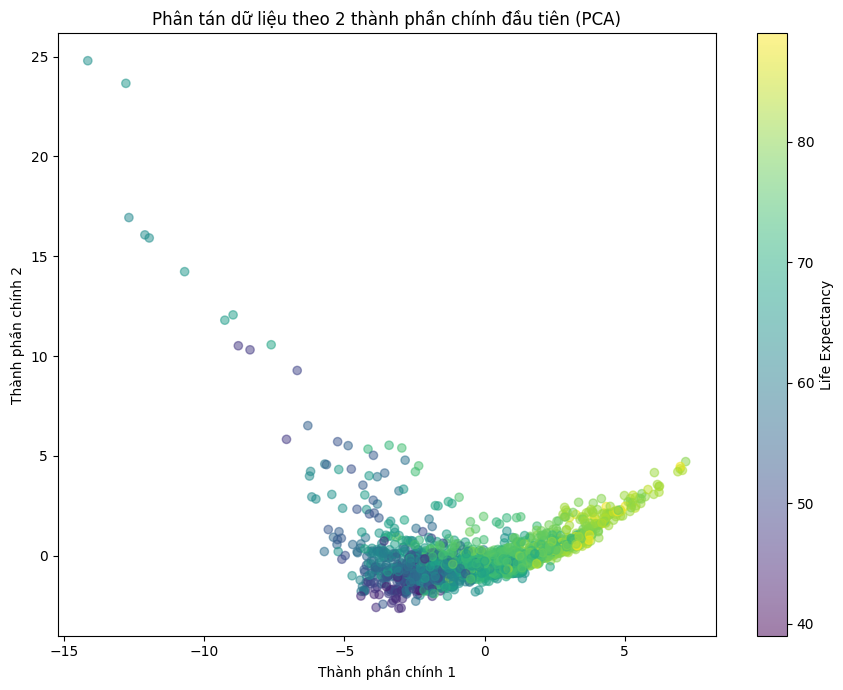

In [23]:
# Trực quan hóa dữ liệu PCA
# Vẽ biểu đồ phân tán cho 2 thành phần chính đầu tiên
plt.figure(figsize=(9, 7))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Life Expectancy')
plt.xlabel('Thành phần chính 1')
plt.ylabel('Thành phần chính 2')
plt.title('Phân tán dữ liệu theo 2 thành phần chính đầu tiên (PCA)')
plt.tight_layout()
plt.savefig('../results/figures/pca_scatter_plot.png')

## 2.3. Trực quan hóa các thành phần chính quan trọng

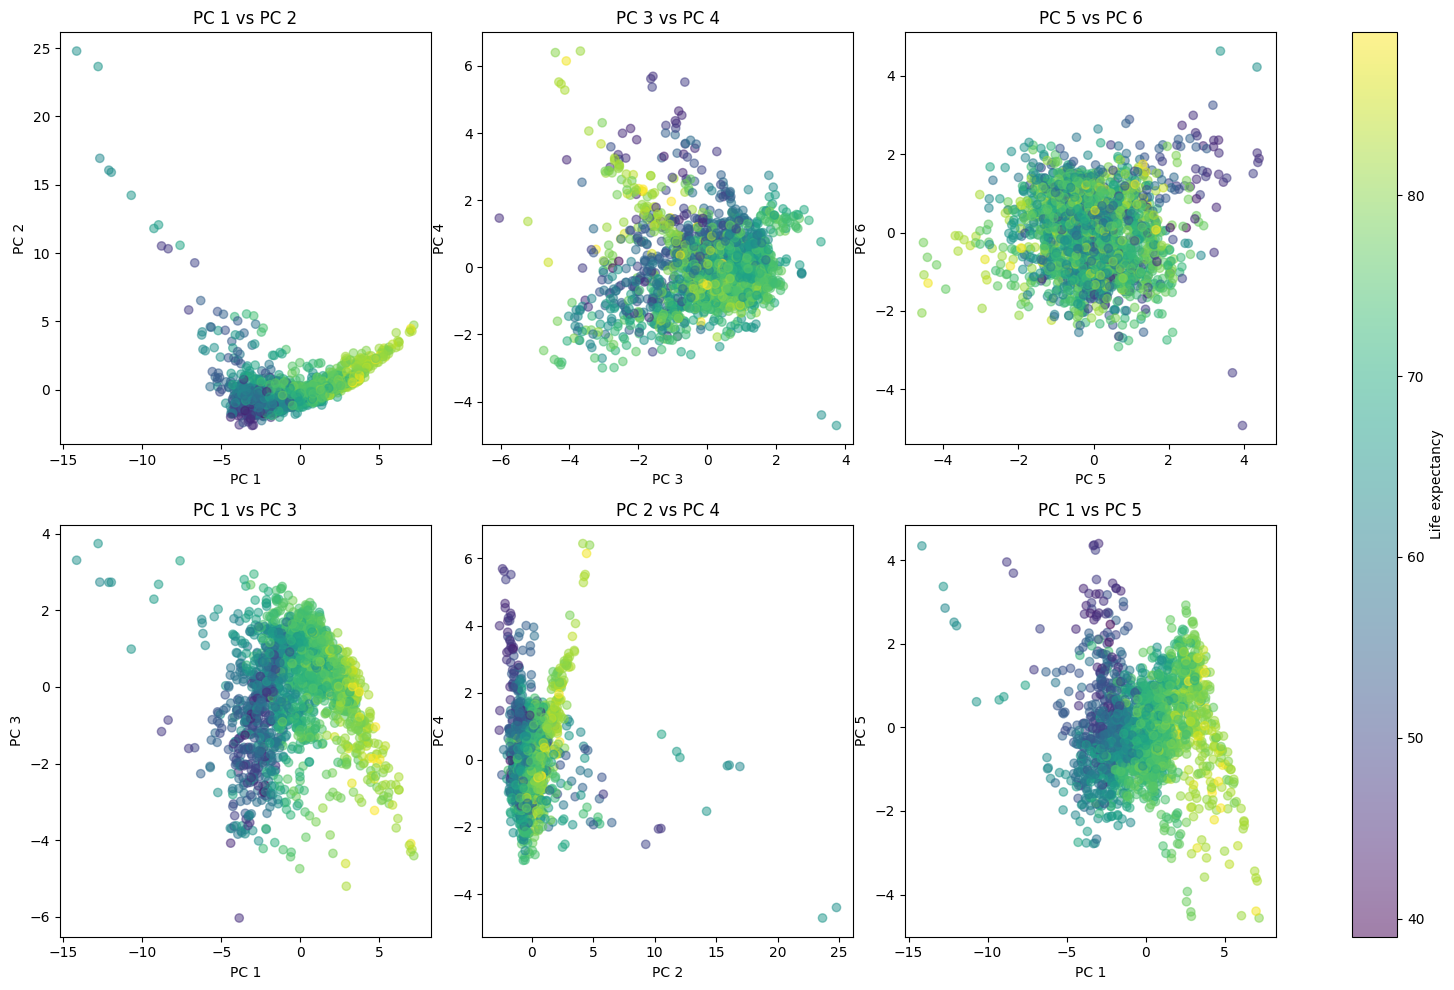

In [24]:
# Trực quan hóa các thành phần chính quan trọng
if n_components_95 >= 6:
    # Vẽ biểu đồ phân tán cho 6 thành phần chính đầu tiên (cặp đôi)
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
    axes = axes.flatten()

    pairs = [(0, 1), (2, 3), (4, 5), (0, 2), (1, 3), (0, 4)]

    for i, (pc1, pc2) in enumerate(pairs):
        scatter = axes[i].scatter(X_train_pca[:, pc1], X_train_pca[:, pc2], c=y_train, cmap='viridis', alpha=0.5)
        axes[i].set_xlabel(f'PC {pc1+1}')
        axes[i].set_ylabel(f'PC {pc2+1}')
        axes[i].set_title(f'PC {pc1+1} vs PC {pc2+1}')

    plt.tight_layout()
    plt.colorbar(scatter, ax=axes, label='Life expectancy')
    plt.savefig('../results/figures/pca_multiple_components.png')

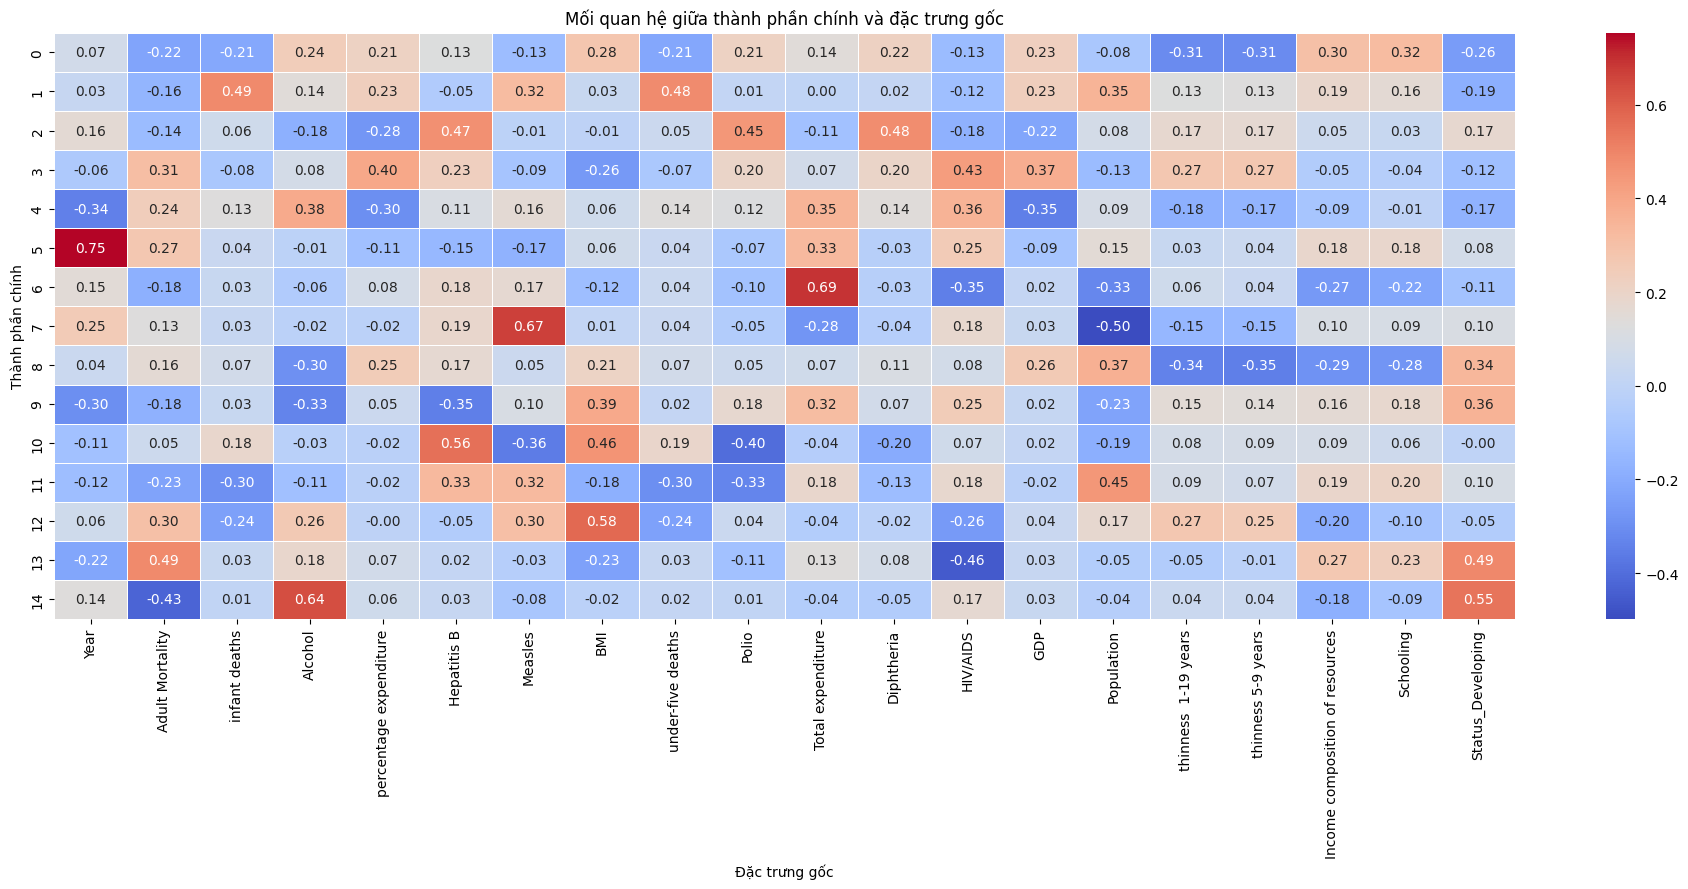

In [25]:
# Phân tích mối quan hệ giữa các thành phần chính và các đặc trưng gốc
pca_components = pd.DataFrame(
    pca.components_,
    columns=X.columns
)

plt.figure(figsize=(19, 9))
sns.heatmap(pca_components.iloc[:n_components_95], annot=True, cmap='coolwarm', 
            fmt='.2f', linewidths=0.5)
plt.xlabel('Đặc trưng gốc')
plt.ylabel('Thành phần chính')
plt.title('Mối quan hệ giữa thành phần chính và đặc trưng gốc')
plt.tight_layout()
plt.savefig('../results/figures/pca_features_correlation.png')


# Phần 3: Xây dụng mô hình hồi quy

## Sử dụng thư viện

In [26]:
from sklearn.neural_network import MLPRegressor

ann = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
ann.fit(X_train_pca_95, y_train)

ann_train_pred = ann.predict(X_train_pca_95)
ann_test_pred = ann.predict(X_test_pca_95)

In [27]:
print(f"MSE Train: {mean_squared_error(y_train, ann_train_pred):.4f}, MSE Test: {mean_squared_error(y_test, ann_test_pred):.4f}")
print(f"R2 Train: {r2_score(y_train, ann_train_pred):.4f}, R2 Test: {r2_score(y_test, ann_test_pred):.4f}")

MSE Train: 6.2644, MSE Test: 9.5565
R2 Train: 0.9296, R2 Test: 0.8977


## Công thức

In [28]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [29]:
print(X_train_pca_95.shape)
print(X_test_pca_95.shape)
print(y_train.shape)
print(y_test.shape)


(2056, 15)
(882, 15)
(2056,)
(882,)


In [30]:
X_train_T = X_train_pca_95.T      
X_test_T  = X_test_pca_95.T    

y_train_T = y_train.reshape(1, -1)  
y_test_T  = y_test.reshape(1, -1)  


In [31]:
def cost_mse(y, yhat):
    return np.mean((y - yhat) ** 2)

def ann(X_train, y_train, X_val, y_val, h, iter):
    n_features = X_train.shape[0]
    n_samples  = X_train.shape[1]
    C = 1

    W1 = 0.01 * np.random.randn(h, n_features)
    b1 = np.zeros((h, 1))
    W2 = 0.01 * np.random.randn(C, h)
    b2 = np.zeros((C, 1))
    eta = 0.001
    loss_history = []
    for i in range(iter + 1):
        Z1 = W1 @ X_train + b1
        A1 = np.maximum(Z1, 0)  
        Z2 = W2 @ A1 + b2
        Yhat = Z2 

        loss = cost_mse(y_train, Yhat)          
        loss_history.append(loss)
        if i % 1000 == 0:
            print(f"iter {i}, loss = {loss:.6f}")

        E2 = (Yhat - y_train) / n_samples    
        dW2 = E2 @ A1.T                      
        db2 = np.sum(E2, axis=1, keepdims=True)
        E1 = W2.T @ E2                      
        E1[Z1 <= 0] = 0                     
        dW1 = E1 @ X_train.T                
        db1 = np.sum(E1, axis=1, keepdims=True)

        W1 -= eta * dW1
        b1 -= eta * db1
        W2 -= eta * dW2
        b2 -= eta * db2
    plt.plot(loss_history[1000:])
    plt.xlabel("Iteration")
    plt.ylabel("Loss (MSE)")
    plt.title("Loss Curve During Training")
    plt.grid(True)
    plt.show()
    
    def predict(X):
        Z1 = W1 @ X + b1
        A1 = np.maximum(Z1, 0)
        Z2 = W2 @ A1 + b2
        return Z2

    y_train_pred = predict(X_train)
    y_val_pred   = predict(X_val)

    return (
        mean_squared_error(y_train.T, y_train_pred.T),
        r2_score(y_train.T, y_train_pred.T),
        mean_squared_error(y_val.T, y_val_pred.T),
        r2_score(y_val.T, y_val_pred.T),
    )


iter 0, loss = 4904.864587
iter 1000, loss = 14.497870
iter 2000, loss = 11.977780
iter 3000, loss = 10.999400
iter 4000, loss = 10.395334
iter 5000, loss = 9.964709
iter 6000, loss = 9.619235
iter 7000, loss = 9.333930
iter 8000, loss = 9.071446
iter 9000, loss = 8.861355
iter 10000, loss = 8.691480
iter 11000, loss = 8.549775
iter 12000, loss = 8.425256
iter 13000, loss = 8.314189
iter 14000, loss = 8.210236
iter 15000, loss = 8.108500
iter 16000, loss = 8.029945
iter 17000, loss = 7.957397
iter 18000, loss = 7.887879
iter 19000, loss = 7.825573
iter 20000, loss = 7.765661
iter 21000, loss = 7.707096
iter 22000, loss = 7.648797
iter 23000, loss = 7.585067
iter 24000, loss = 7.512772
iter 25000, loss = 7.425348


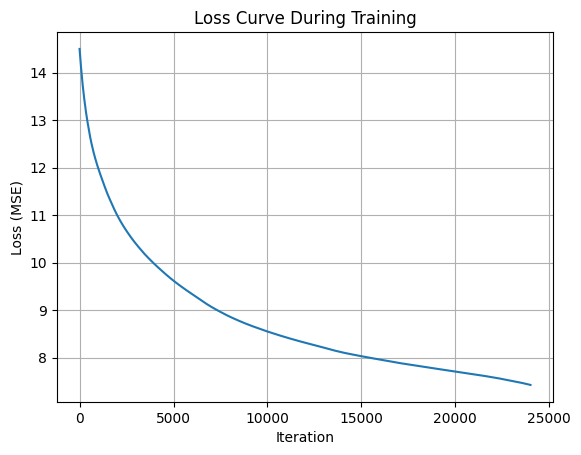

MSE Train: 7.4252, MSE Validation: 8.8066
R2 Train: 0.9165, R2 Validation: 0.9058


In [32]:
train_mse, train_r2, val_mse, val_r2= ann(X_train_scaled.T, y_train_T, X_test_scaled.T, y_test_T, 100, 25000)
print(f"MSE Train: {train_mse:.4f}, MSE Validation: {val_mse:.4f}")
print(f"R2 Train: {train_r2:.4f}, R2 Validation: {val_r2:.4f}")

iter 0, loss = 4904.687328
iter 1000, loss = 14.231672
iter 2000, loss = 12.430560
iter 3000, loss = 11.638151
iter 4000, loss = 11.178257
iter 5000, loss = 10.840733
iter 6000, loss = 10.572826
iter 7000, loss = 10.340041
iter 8000, loss = 10.151567
iter 9000, loss = 9.989826
iter 10000, loss = 9.852365
iter 11000, loss = 9.742864
iter 12000, loss = 9.646366
iter 13000, loss = 9.559257
iter 14000, loss = 9.488024
iter 15000, loss = 9.427626
iter 16000, loss = 9.371834
iter 17000, loss = 9.319357
iter 18000, loss = 9.273637
iter 19000, loss = 9.231740
iter 20000, loss = 9.193305
iter 21000, loss = 9.155266
iter 22000, loss = 9.115087
iter 23000, loss = 9.078993
iter 24000, loss = 9.047754
iter 25000, loss = 9.019510
iter 26000, loss = 8.993287
iter 27000, loss = 8.968200
iter 28000, loss = 8.942758
iter 29000, loss = 8.916903
iter 30000, loss = 8.893755
iter 31000, loss = 8.872629
iter 32000, loss = 8.851387
iter 33000, loss = 8.830575
iter 34000, loss = 8.811163
iter 35000, loss = 8.7

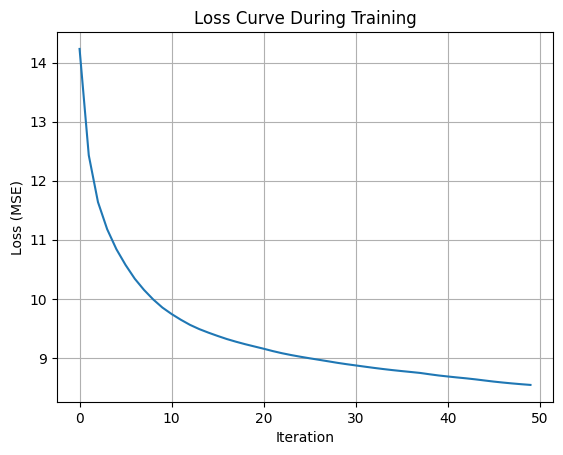

MSE Train: 8.5423, MSE Validation: 9.8131
R2 Train: 0.9040, R2 Validation: 0.8950


In [43]:
# for h in [100, 75, 50]:
#     print(f"\nh={h}:")
train_mse_pca, train_r2_pca, val_mse_pca, val_r2_pca = ann(X_train_T, y_train_T, X_test_T, y_test_T, 100, 50000)
print(f"MSE Train: {train_mse_pca:.4f}, MSE Validation: {val_mse_pca:.4f}")
print(f"R2 Train: {train_r2_pca:.4f}, R2 Validation: {val_r2_pca:.4f}")
